<table>
    <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="..\images\qworld.jpg" width="70%" align="left"></a></td>
        <td style="background-color:#ffffff;" width="*"></td>
        <td  style="background-color:#ffffff;vertical-align:text-top;"><a href="https://qsoftware.lu.lv" target="_blank"><img src="..\images\logo.jpg" width="25%" align="right"></a></td>        
    </tr>
    <tr><td colspan="3" align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        prepared by Maksim Dimitrijev
    </td></tr>
    <tr><td colspan="3" align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2>Multiple Control Constructions</h2>

Remember CNOT gate, which applies the NOT operator to the target qubit if the control qubit is in state $\ket{1}$. What can we do if we want to apply the NOT operator when the control qubit is in state $\ket{0}$? In other words, we want to obtain the following operator:

$\mymatrix{cccc}{0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1}$.

We can use our regular CNOT operator, and to change the condition for the control qubit we can apply NOT operator to it before the CNOT - this way the NOT operator will be applied to the target qubit when initially the state of the control qubit was $\ket{0}$.

Now we will contruct our operator for two qubits:
<ul>
    <li>Apply NOT operator to qubit 1;</li>
    <li>Apply CNOT operator, where qubit 1 is control and qubit 0 is target;</li>
    <li>Apply NOT operator to qubit 1 - to revert it to the initial state.</li>
</ul>

Let's check our implementation.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(2)
creg1 = ClassicalRegister(2)

mycircuit1 = QuantumCircuit(qreg1,creg1)

mycircuit1.x(qreg1[1])

mycircuit1.cx(qreg1[1],qreg1[0])

# Returning control qubit to the initial state
mycircuit1.x(qreg1[1])

job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit1.draw(output="mpl")

Although this trick is quite simple, this approach is important and will be very useful in our following implementations.

<h3>CCNOT</h3>

Now we will discuss CNOT gate controlled by two qubits (also called Toffoli gate). This gate needs 3 parameters to be provided:

    circuit.ccx(control-qubit1,control-qubit2,target-qubit)

The idea behind this gate is simple - NOT operator is applied to the target qubit when both control qubits are in state $\ket{1}$. Below you can see its matrix representation:

$\mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0}$.

CCNOT gate can also be applied to the target qubit if control qubits are in different states by using our recently considered trick. For example, the following implementation allows to apply NOT operator to the target qubit if both control qubits were initially in state $\ket{0}$.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg2 =  QuantumRegister(3)
creg2 = ClassicalRegister(3)

mycircuit2 = QuantumCircuit(qreg2,creg2)

mycircuit2.x(qreg2[2])
mycircuit2.x(qreg2[1])

mycircuit2.ccx(qreg2[2],qreg2[1],qreg2[0])

# Returning control qubits to the initial state
mycircuit2.x(qreg2[1])
mycircuit2.x(qreg2[2])

job = execute(mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit2,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit2.draw(output="mpl")

  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


<Figure size 513.372x367.889 with 1 Axes>

<h3>More controls</h3>

There could also exist need to perform control with more than two qubits. Qiskit provides only operator with two control qubits, but we can use it to form a structure that allows to involve more qubits for control. For this purpose we will also use additional qubits. The idea for the structure is to control the qubit by another two qubits, and then to use this target qubit as control for the next CCNOT operation. Let's check an example for three control qubits. We will use qubits 4,3,2 for control, qubit 0 for target, and qubit 1 as additional qubit to help us perform the operation. You can remove any of x-gates to see that we control the qubit 0 with all three qubits.

{'11101': 10000}


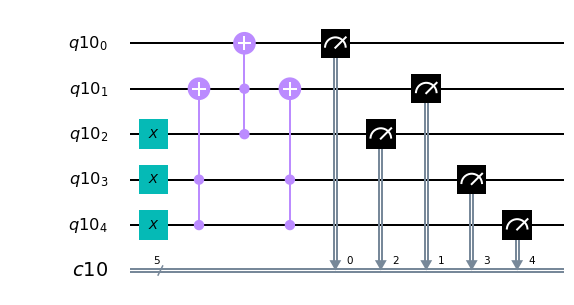

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg3 =  QuantumRegister(5)
creg3 = ClassicalRegister(5)

mycircuit3 = QuantumCircuit(qreg3,creg3)

mycircuit3.x(qreg3[4])
mycircuit3.x(qreg3[3])
mycircuit3.x(qreg3[2])

mycircuit3.ccx(qreg3[4],qreg3[3],qreg3[1])
mycircuit3.ccx(qreg3[2],qreg3[1],qreg3[0])

# Returning additional qubit to the initial state
mycircuit3.ccx(qreg3[4],qreg3[3],qreg3[1])

mycircuit3.measure(qreg3,creg3)

job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=10000)
counts3 = job.result().get_counts(mycircuit3)
print(counts3) # print the outcomes

mycircuit3.draw(output="mpl")

<h3>Task 1</h3>

Implement the NOT operator controlled by 4 qubits. You will need additional qubits.

{'1111001': 10000}


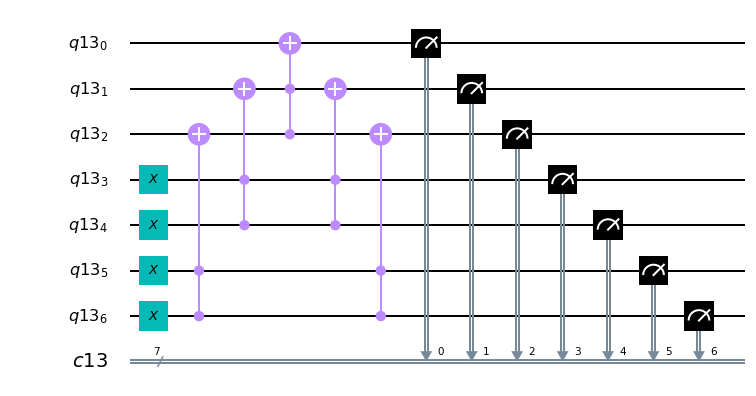

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg4 =  QuantumRegister(7)
creg4 = ClassicalRegister(7)

mycircuit4 = QuantumCircuit(qreg4,creg4)

mycircuit4.x(qreg4[6])
mycircuit4.x(qreg4[5])
mycircuit4.x(qreg4[4])
mycircuit4.x(qreg4[3])

mycircuit4.ccx(qreg4[6],qreg4[5],qreg4[2])
mycircuit4.ccx(qreg4[4],qreg4[3],qreg4[1])
mycircuit4.ccx(qreg4[2],qreg4[1],qreg4[0])

# Returning additional qubits to the initial state
mycircuit4.ccx(qreg4[4],qreg4[3],qreg4[1])
mycircuit4.ccx(qreg4[6],qreg4[5],qreg4[2])

mycircuit4.measure(qreg4,creg4)

job = execute(mycircuit4,Aer.get_backend('qasm_simulator'),shots=10000)
counts4 = job.result().get_counts(mycircuit4)
print(counts4) # print the outcomes

mycircuit4.draw(output="mpl")

<a href="B74_Multiple_Control_Constructions_Solutions.ipynb#task1">click for our solution</a>

<h3>Task 2</h3>

Implement the following control - the NOT operator is applied to the target qubit if 5 control qubits are initially in the state $\ket{10101}$.

{'000000000': 10000}


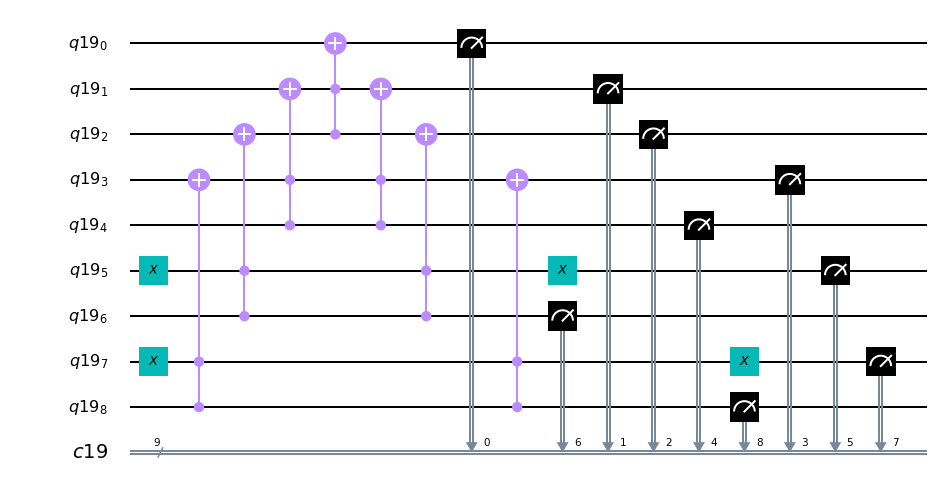

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg5 =  QuantumRegister(9)
creg5 = ClassicalRegister(9)

mycircuit5 = QuantumCircuit(qreg5,creg5)

mycircuit5.x(qreg5[7])
mycircuit5.x(qreg5[5])

mycircuit5.ccx(qreg5[8],qreg5[7],qreg5[3])
mycircuit5.ccx(qreg5[6],qreg5[5],qreg5[2])
mycircuit5.ccx(qreg5[4],qreg5[3],qreg5[1])
mycircuit5.ccx(qreg5[2],qreg5[1],qreg5[0])

# Returning additional qubits to the initial state
mycircuit5.ccx(qreg5[4],qreg5[3],qreg5[1])
mycircuit5.ccx(qreg5[6],qreg5[5],qreg5[2])
mycircuit5.ccx(qreg5[8],qreg5[7],qreg5[3])
mycircuit5.x(qreg5[7])
mycircuit5.x(qreg5[5])


mycircuit5.measure(qreg5,creg5)

job = execute(mycircuit5,Aer.get_backend('qasm_simulator'),shots=10000)
counts5 = job.result().get_counts(mycircuit5)
print(counts5) # print the outcomes

mycircuit5.draw(output="mpl")

<a href="B74_Multiple_Control_Constructions_Solutions.ipynb#task2">click for our solution</a>

<h3>Task 3 (optional)</h3>

Implement the parametrized controlled NOT operator with 4 control qubits, where parameter will be the state of control qubits for which NOT operator will be applied to the target qubit.

As a result you need to define the following function: <i>control(circuit,quantum_reg,number)</i>, where:
<ul>
    <li><i>circuit</i> allows to pass the quantum circuit;</li>
    <li><i>quantum_reg</i> allows to pass the quantum register;</li>
    <li><i>state</i> is the state of control qubits, between 0 and 15, where 0 corresponds to 0000 and 15 corresponds to 1111 (like binary numbers :) ).</li>
</ul>

In [48]:
#state - the state of control qubits, between 0 and 15.

def modFunc(state):
    a = []
    a_inverse = []
    for i in range(4):
        a.append(0)
        a_inverse.append(0)
        
    t1 = state
    t2 = state
    for i in range(4):
        t2 = t1 % 2
        t1 = t1 // 2
        a[i] = t2
      
    return a
    

#print(modFunc(5))
    
def control(circuit,quantum_reg,state):
    #code example (you might need to remove it for your solution):

    res = modFunc(state)
    for i in range(4):
        if (res[i] == 0):
            circuit.x(quantum_reg[i + 3])
    circuit.ccx(quantum_reg[6],quantum_reg[5],quantum_reg[2])
    circuit.ccx(quantum_reg[4],quantum_reg[3],quantum_reg[1])
    circuit.ccx(quantum_reg[2],quantum_reg[1],quantum_reg[0])
    circuit.ccx(quantum_reg[4],quantum_reg[3],quantum_reg[1])
    circuit.ccx(quantum_reg[6],quantum_reg[5],quantum_reg[2])
    for i in range(4):
        if (res[i] == 1):
            circuit.x(quantum_reg[i + 3])
    

You can play around with the following code to see that your function is implementing the mentioned control operation (if you did it correctly, in provided example the value of last bit after measurement will be 1).

In [49]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg6 =  QuantumRegister(7)
creg6 = ClassicalRegister(7)

mycircuit6 = QuantumCircuit(qreg6,creg6)

mycircuit6.x(qreg6[5])
mycircuit6.x(qreg6[3])
control(mycircuit6,qreg6,5)
mycircuit6.measure(qreg6,creg6)

job = execute(mycircuit6,Aer.get_backend('qasm_simulator'),shots=10000)
counts6 = job.result().get_counts(mycircuit6)
print(counts6)

{'1010001': 10000}


<a href="B74_Multiple_Control_Constructions_Solutions.ipynb#task3">click for our solution</a>